CHICAGO TEMPERTURE

In [1]:
# We will start off by cleaning the data from the Chicago_Energy_Benchmarking_-_2019_Data_Reported_in_2020.csv

In [1]:
# we will be importing a few libraries that can help us with this

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Reading data from the .csv file into a pandasdataframe

C:\Users\meraj\AppData\Local\Temp/ipykernel_20472/3310921610.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parsed['TOTAL EMMISSIONS'] = total


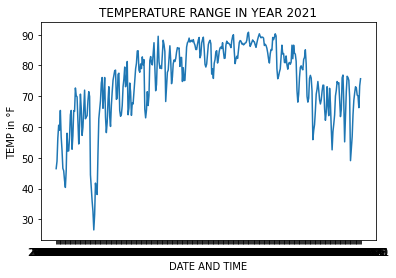

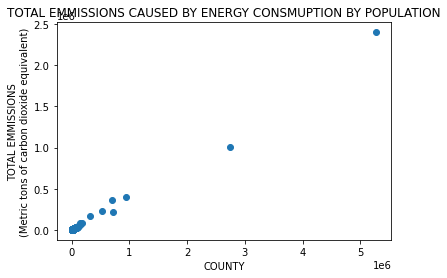

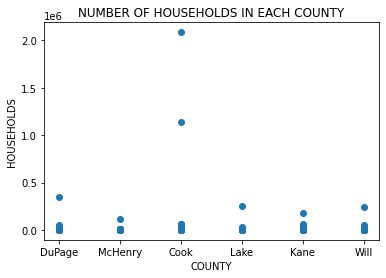

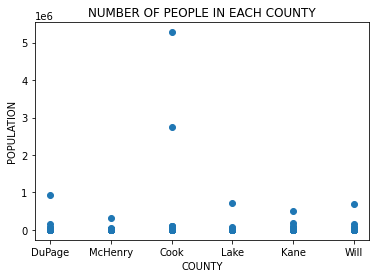

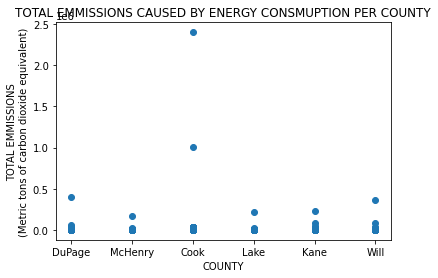

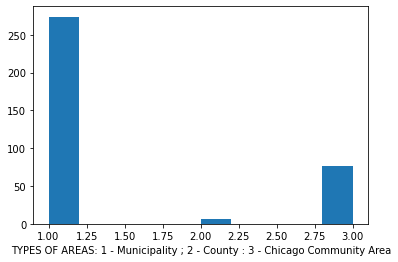

THE TOTAL POPULATION OF COOK COUNTY: 13156661


In [83]:
df = pd.read_csv('ChicagoTemps2021.csv')


file = pd.ExcelFile('CMAP-2019-Local-Emissions-SummariesRaw-Data.xlsx')
df2 = pd.read_excel(file,'Data')
df2.head()


# Filter counties near Chicago
counties = df2.loc[df2['COUNTY'].isin(['Cook','Lake','Will','Kane','McHenry','DuPage'])] 
counties

# RES_NG_CO2E_PER - Residential building natural gas emissions per capita
# NONRES_NG_CO2E_PER - Non-residential building natural gas emissions per capita
# WASTE_CO2E_PER - Waste sector emissions per capita 
# HH - Households
# WASTE_CO2E - Waste Sector emmissions

parsed = counties[["GEO", "TYPE","POP","COUNTY","HOUSEHOLDS","RES_NG_CO2E_PER","NONRES_NG_CO2E_PER","WASTE_CO2E_PER","WASTE_CO2E"]]
parsed

total = parsed['RES_NG_CO2E_PER']+parsed['NONRES_NG_CO2E_PER']+parsed['WASTE_CO2E_PER']+parsed['WASTE_CO2E']
parsed['TOTAL EMMISSIONS'] = total


plt.title('TEMPERATURE RANGE IN YEAR 2021')
plt.plot(df['datetime'],df['temp'])
plt.xlabel("DATE AND TIME")
plt.ylabel("TEMP in °F")
plt.show()


# plt.scatter(parsed['POP'],parsed['WASTE_CO2E'])
# plt.xlabel("POPULATION")
# plt.ylabel("WASTE EMMISIONS")
# plt.show()

plt.title('TOTAL EMMISSIONS CAUSED BY ENERGY CONSMUPTION BY POPULATION')
plt.scatter(parsed['POP'],parsed['TOTAL EMMISSIONS'])
plt.xlabel("COUNTY")
plt.ylabel("TOTAL EMMISSIONS\n(Metric tons of carbon dioxide equivalent)")
plt.show()

plt.title('NUMBER OF HOUSEHOLDS IN EACH COUNTY')
plt.scatter(parsed['COUNTY'],parsed['HOUSEHOLDS'])
plt.xlabel("COUNTY")
plt.ylabel("HOUSEHOLDS")
plt.show()

plt.title('NUMBER OF PEOPLE IN EACH COUNTY')
plt.scatter(parsed['COUNTY'],parsed['POP'])
plt.ylabel("POPULATION")
plt.xlabel("COUNTY")
plt.show()

plt.title('TOTAL EMMISSIONS CAUSED BY ENERGY CONSMUPTION PER COUNTY')
plt.scatter(parsed['COUNTY'],parsed['TOTAL EMMISSIONS'])
plt.xlabel("COUNTY")
plt.ylabel("TOTAL EMMISSIONS\n(Metric tons of carbon dioxide equivalent)")
plt.show()

parsed=parsed.replace(to_replace="Municipality",value=1)
parsed=parsed.replace(to_replace="County",value=2)
parsed=parsed.replace(to_replace="Chicago Community Area",value=3)
parsed=parsed.replace(to_replace="Region",value=4)

pop = parsed['POP'].to_numpy()
typ = parsed['TYPE'].to_numpy()

total_pop = parsed[["COUNTY","POP"]]
total_pop = total_pop.loc[total_pop['COUNTY']=='Cook']

total_cook_pop = total_pop['POP']
total_cook_pop = total_cook_pop.sum()

bins = np.unique(typ)
#plt.hist(pop, bins, histtype='bar', rwidth=1.2)
plt.hist(typ)
plt.xlabel("TYPES OF AREAS: 1 - Municipality ; 2 - County : 3 - Chicago Community Area")
plt.show()
parsed
total_pop
print('THE TOTAL POPULATION OF COOK COUNTY:',total_cook_pop)
#df2

In [74]:
!pip install folium

In [52]:
import folium

In [53]:
chi_map = folium.Map(location=[41.881832,-87.623177])
chi_map

In [71]:
complaints = pd.read_csv('CDPH_Environmental_Complaints.csv')
complaints = complaints[["LATITUDE","LONGITUDE","COMPLAINT TYPE","COMPLAINT ID"]]
complaints = complaints.loc[complaints['COMPLAINT TYPE']=='AIR POLLUTION WORK ORDER']

complaints = complaints[["LATITUDE","LONGITUDE","COMPLAINT ID"]]

#complaints.dropna()
complaints


,LATITUDE,LONGITUDE,COMPLAINT ID
3,41.743166,-87.649500,600934250
4,41.809485,-87.606711,600934911
5,41.732496,-87.597596,600934915
7,41.732496,-87.597596,600934924
8,41.732496,-87.597596,600934915
...,...,...,...
2409,41.977889,-87.799561,601116805
2411,41.880193,-87.760489,601117063
2412,41.915055,-87.657802,601117058
2417,41.819405,-87.645962,601117250


In [86]:
from folium.plugins import HeatMap

chi_map = folium.Map(location=[41.881832,-87.623177],zoom_start=10)

HeatMap(complaints,min_opacity=0.2,blur=25
       ).add_to(folium.FeatureGroup(name='Heat Map').add_to(chi_map))
#folium.LayerControl.add_to(chi_map)
chi_map